In [2]:
# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/prosperLoanData.csv",parse_dates=True)
df.shape # (Rows, columns)

(113937, 81)

In [4]:
pd.set_option('display.max_rows',None)
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

### Dealing with missing Data

In [5]:
#Dealing with columns that has a lot of missing values
null_cols = ['TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate',
       'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber',
       'CreditGrade','GroupKey','TotalProsperLoans']
df[null_cols] = df[null_cols].fillna(0)
#Dealing with columns that has fewer missing values
df.dropna(subset=['BorrowerAPR','BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration','DebtToIncomeRatio','CurrentCreditLines',], inplace=True)
# Dealing with closed date column
df["ClosedDate"].fillna("open", inplace=True)
# Dealing with columns with values applicable only after 2009
non_applicable_cols = ['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
       'ProsperRating (Alpha)','ProsperScore']
df[non_applicable_cols] = df[non_applicable_cols].fillna(0)

In [6]:
df.isna().sum()

ListingKey                             0
ListingNumber                          0
ListingCreationDate                    0
CreditGrade                            0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
GroupKey                               0
DateCreditPulled

#### Removing Garbage Data

In [7]:
# Dropping unecessary columns
df.drop(['ListingKey', 'GroupKey','LoanKey','MemberKey'], axis=1,inplace = True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94843 entries, 0 to 113936
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingNumber                        94843 non-null  int64  
 1   ListingCreationDate                  94843 non-null  object 
 2   CreditGrade                          94843 non-null  object 
 3   Term                                 94843 non-null  int64  
 4   LoanStatus                           94843 non-null  object 
 5   ClosedDate                           94843 non-null  object 
 6   BorrowerAPR                          94843 non-null  float64
 7   BorrowerRate                         94843 non-null  float64
 8   LenderYield                          94843 non-null  float64
 9   EstimatedEffectiveYield              94843 non-null  float64
 10  EstimatedLoss                        94843 non-null  float64
 11  EstimatedReturn            

#### Visulazing the correlation Matrix

In [9]:
corr_matrix = df.corr()
corr_matrix

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.306021,-0.072435,-0.137101,-0.135213,0.411159,0.291923,0.374754,0.598566,0.464853,...,0.306441,0.114698,-0.257482,-0.252529,-0.105733,0.029261,-0.171571,-0.125612,-0.067857,-0.344635
Term,0.306021,1.000000,-0.013837,0.025044,0.025655,0.225847,0.073748,0.290186,0.228069,0.195299,...,-0.157669,0.035969,-0.032162,-0.029552,-0.035162,-0.025174,-0.066184,-0.049870,-0.026422,-0.055728
BorrowerAPR,-0.072435,-0.013837,1.000000,0.991325,0.991254,0.644212,0.758792,0.528794,-0.465636,-0.285905,...,0.134096,-0.041428,0.062274,0.062438,0.027378,-0.021891,-0.046814,-0.049268,-0.031157,-0.315292
BorrowerRate,-0.137101,0.025044,0.991325,1.000000,0.999605,0.590443,0.713008,0.480911,-0.517649,-0.333203,...,0.106732,-0.052532,0.091230,0.090947,0.040107,-0.024123,-0.030268,-0.038040,-0.025318,-0.279563
LenderYield,-0.135213,0.025655,0.991254,0.999605,1.000000,0.593803,0.716440,0.484050,-0.517732,-0.332715,...,0.108576,-0.052179,0.089773,0.089488,0.039107,-0.024285,-0.030688,-0.038028,-0.025577,-0.279191
EstimatedEffectiveYield,0.411159,0.225847,0.644212,0.590443,0.593803,1.000000,0.882785,0.915358,0.158565,0.268664,...,0.082407,0.048955,-0.114314,-0.110190,-0.076915,-0.054985,-0.166990,-0.125706,-0.069808,-0.331422
EstimatedLoss,0.291923,0.073748,0.758792,0.713008,0.716440,0.882785,1.000000,0.774438,-0.070601,0.096040,...,0.178052,0.032962,-0.095171,-0.092250,-0.056896,-0.037963,-0.121569,-0.085327,-0.044580,-0.331563
EstimatedReturn,0.374754,0.290186,0.528794,0.480911,0.484050,0.915358,0.774438,1.000000,0.342750,0.460773,...,-0.018505,0.051818,-0.118472,-0.114244,-0.082171,-0.053456,-0.172180,-0.128947,-0.072815,-0.246504
ProsperRating (numeric),0.598566,0.228069,-0.465636,-0.517649,-0.517732,0.158565,-0.070601,0.342750,1.000000,0.872069,...,-0.088757,0.100145,-0.208371,-0.203599,-0.101623,-0.025000,-0.148607,-0.104910,-0.064493,-0.006216
ProsperScore,0.464853,0.195299,-0.285905,-0.333203,-0.332715,0.268664,0.096040,0.460773,0.872069,1.000000,...,-0.090853,0.086054,-0.184792,-0.180320,-0.095275,-0.044831,-0.143052,-0.100574,-0.061812,-0.008860


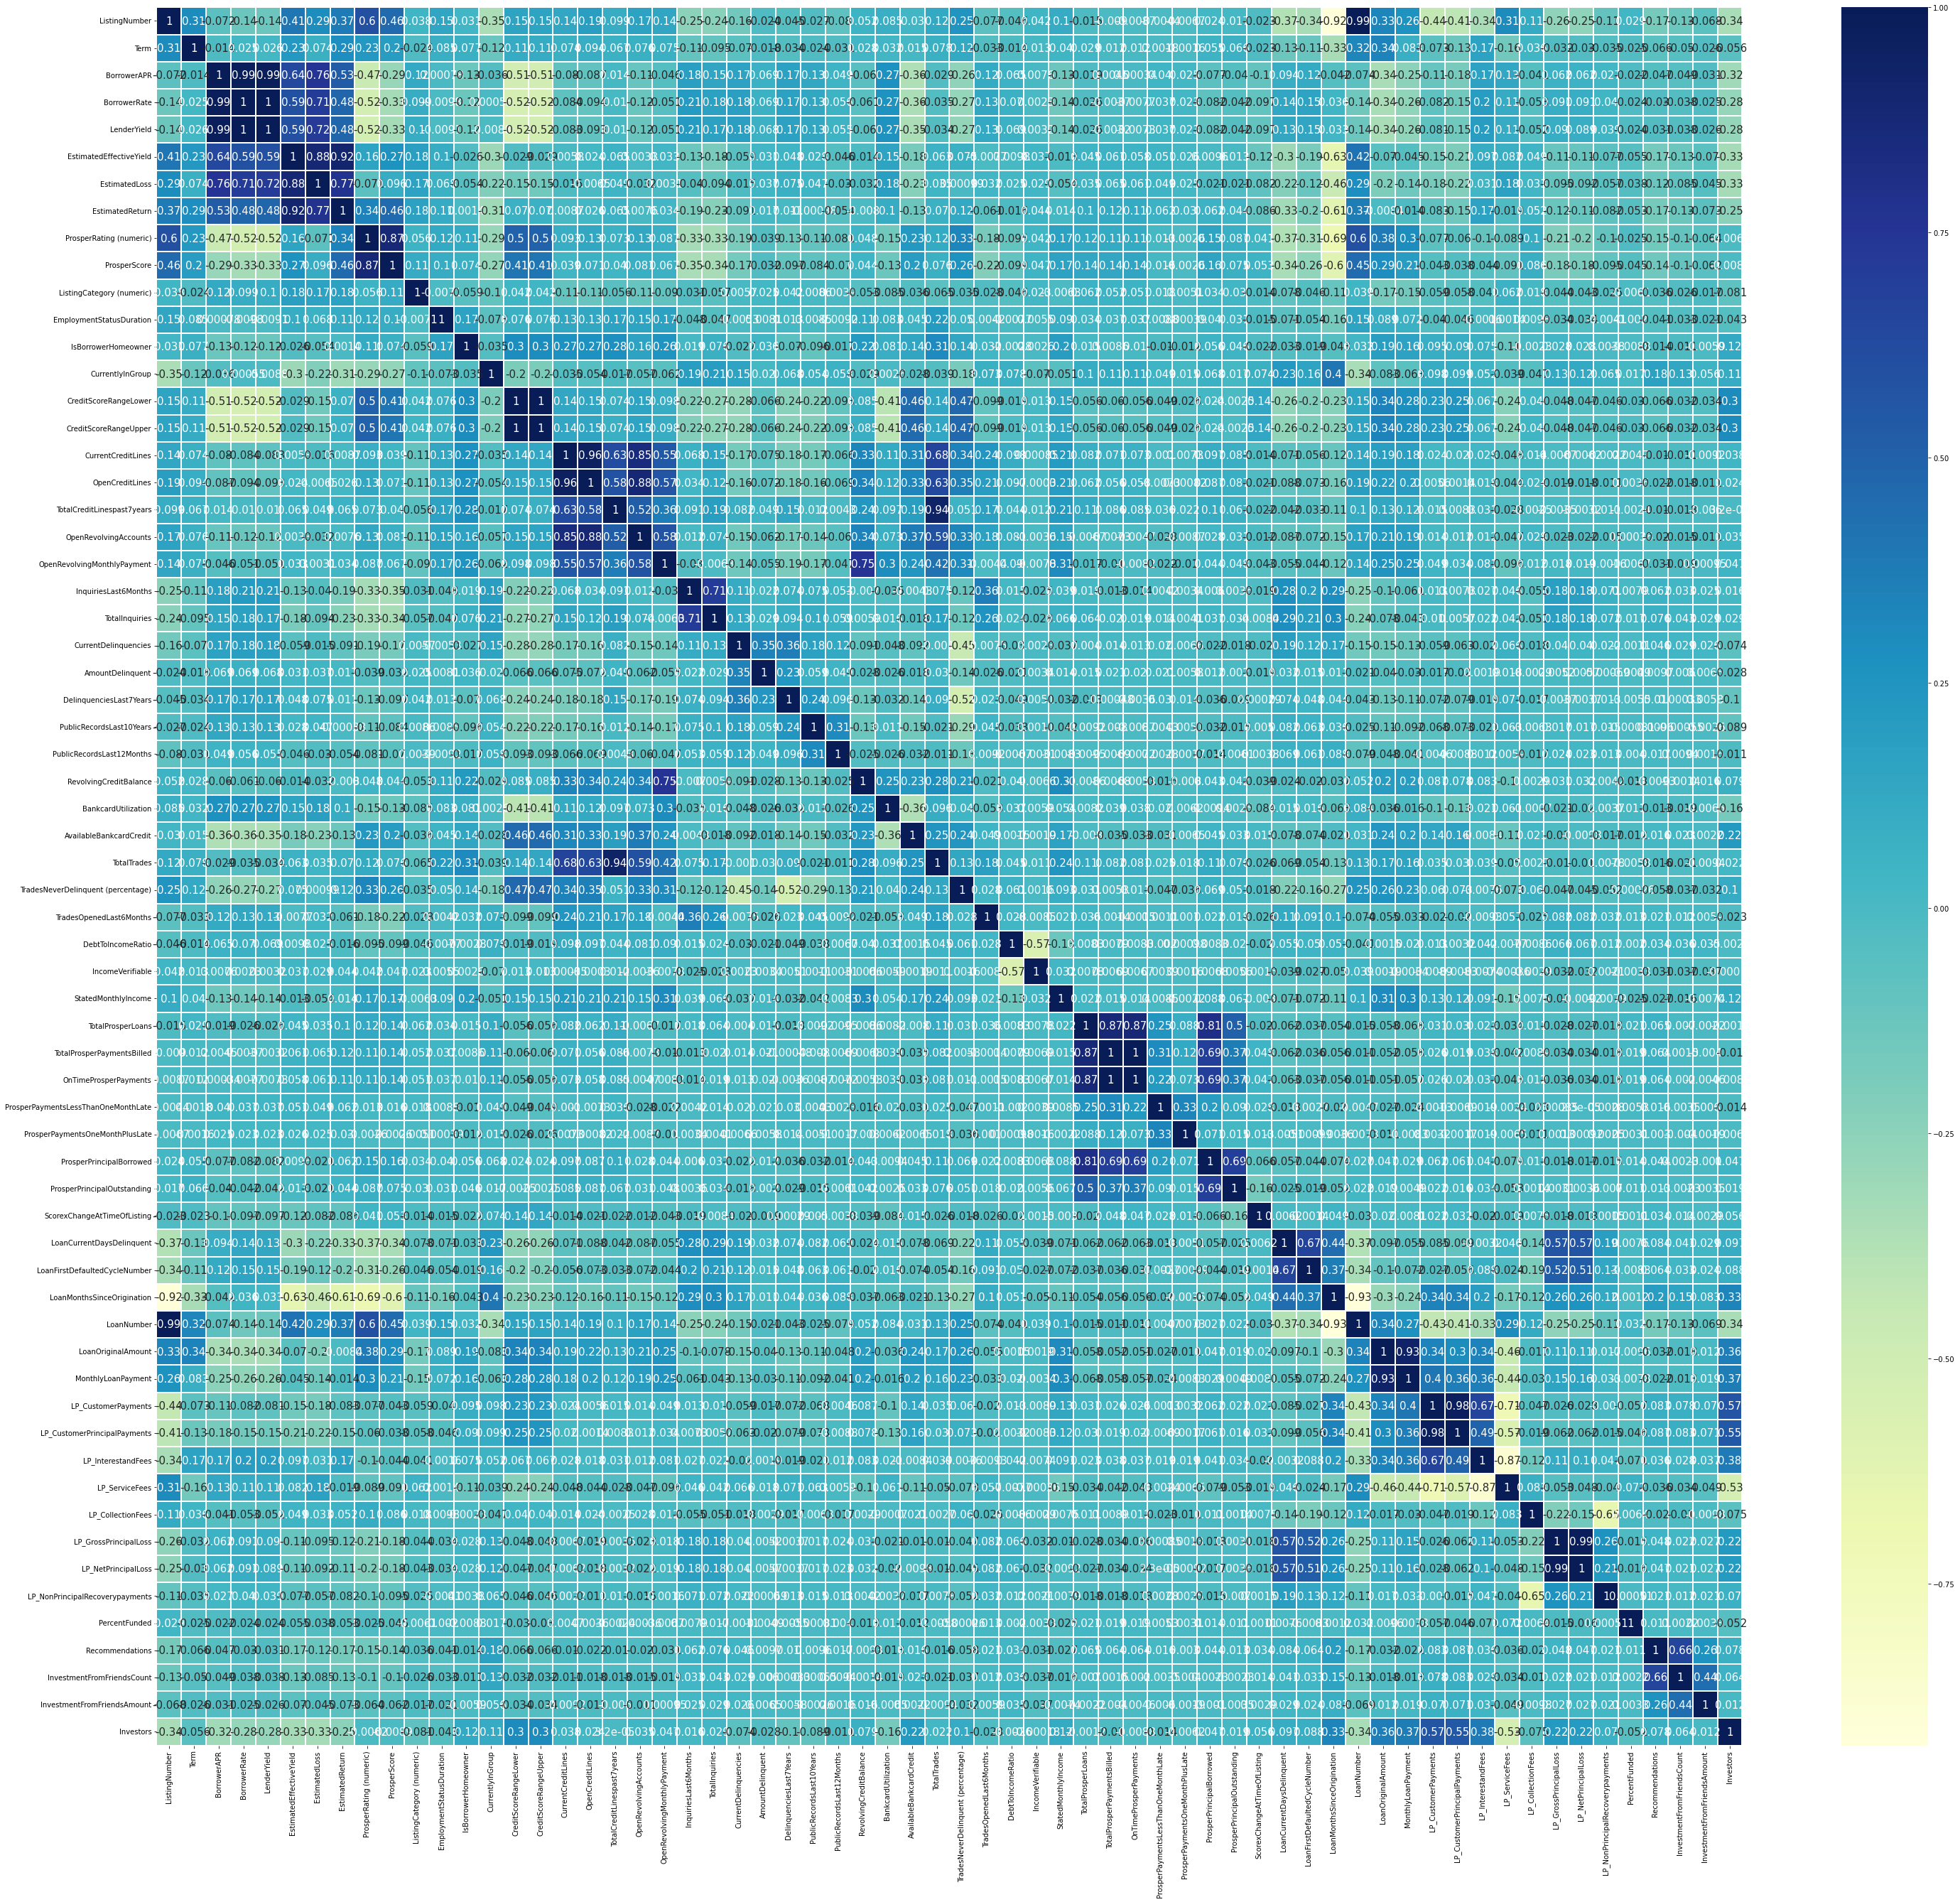

In [11]:
#correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (50,45))

ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths = 1,
                cmap="YlGnBu",
                annot_kws={"fontsize":15}
                ); 
plt.savefig("corr_matrix.png", dpi=300)


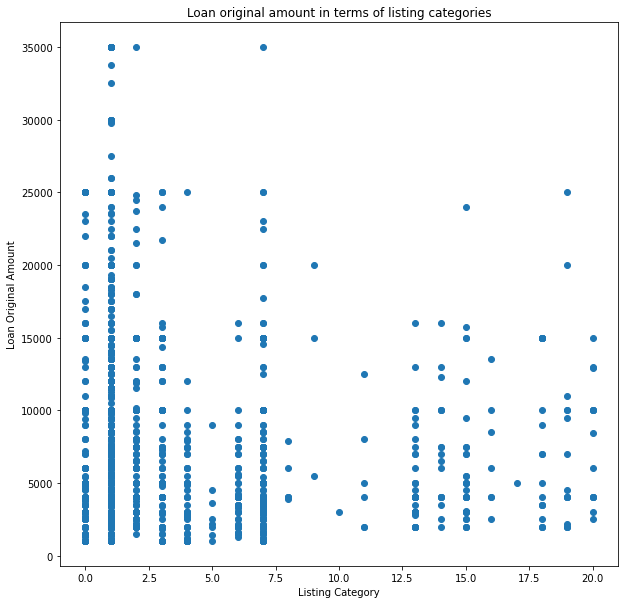

In [10]:
#Visulazing the loans amount according to each category
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter( df["ListingCategory (numeric)"][:2000],df["LoanOriginalAmount"][:2000]);
plt.title("Loan original amount in terms of listing categories")
plt.xlabel("Listing Category")
plt.ylabel("Loan Original Amount");